<a href="https://colab.research.google.com/github/stefanald28/FlaviousTea/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score,recall_score,accuracy_score

In [ ]:
#Load dataset
df = pd.read_csv('Dataset/indonesian_vaccination_tweets.csv')
df

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,reply_to_status
0,1348286903527768065,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,NaN
1,1348302168248340481,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,NaN
2,1348307055040348160,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,NaN
3,1348322660925669377,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,NaN
4,1348425614584266753,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,1384533013568974856,2021-04-20 15:42:48,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,['tegal'],Seputar Kota Tegal,"Tegal Timur, Indonesia","Kota Tegal ""New Normal"" senyum cerah terlihat...",2020-02-23 09:15:00,56,474,11,False,Twitter for iPhone,0,0,False,NaN
13487,1384582641664544769,2021-04-20 19:00:00,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,NaN,Mata Milenial Indonesia,"Jakarta, Indonesia",Megaportal berbasis media online dan tv stream...,2018-09-14 03:57:54,362,19,779,False,TweetDeck,0,2,False,NaN
13488,1384607207564595201,2021-04-20 20:37:37,#bandartogelonline #bocorantogel #angkajitu #p...,"['bandartogelonline', 'bocorantogel', 'angkaji...",Bandar Togel Online | Live casino Online Resmi,NaN,kunjungi web kami https://t.co/uzorzBuGri\n◘Di...,2020-09-25 20:04:29,217,1028,692,False,Twitter Web App,0,1,False,NaN
13489,1384609537689231363,2021-04-20 20:46:53,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,"['kapoldajatim', 'poldajatim', 'polwanjatim', ...",Polsek Tandes Sby,"Kota Surabaya, Jawa Timur",NaN,2016-09-17 03:59:41,218,32,4,False,Twitter for Android,0,0,False,NaN


In [ ]:
#Mengambil Coloumn yang akan di olah
df  = pd.DataFrame(df['text'])
df

,text
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...
2,Sistem satu data mendukung Vaksinasi di Indone...
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...
...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...
13488,#bandartogelonline #bocorantogel #angkajitu #p...
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...


In [ ]:
#Tahapan Cleaning
def remove(tweet):
    tweet = re.sub(r'^RT[\s]+','', tweet)
    tweet = re.sub(r'#','', tweet)
    tweet = re.sub(r'http\S+','', tweet)
    tweet = re.sub(r'[0-9]+','', tweet)
    tweet = re.sub(r'\_'," ", tweet)
    tweet = re.sub("\W+"," ", tweet)
    tweet = re.sub(r'\\n'," ", tweet)
    tweet = re.sub(r':', '', tweet)
    return tweet

df['cleaning'] = df['text'].apply(lambda x: remove(x))
df

,text,cleaning
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...
...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...


In [ ]:
#Tahapan Case folding
df['case_folding'] = df['cleaning'].str.lower()
df

,text,cleaning,case_folding
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...
...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...


In [ ]:
#Tahap Tokenize
df['tokenized_text'] = df['case_folding'].apply(word_tokenize)
df

,text,cleaning,case_folding,tokenized_text
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]"
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi..."
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,..."
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v..."
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ..."
...,...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...,"[wah, bank, sinarmas, dan, as, sinarmas, hebat..."
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...,"[kunci, pemulihan, ekonomi, adalah, ketersedia..."
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...,"[bandartogelonline, bocorantogel, angkajitu, p..."
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...,"[kepada, seluruh, wanita, indonesia, selamat, ..."


In [ ]:
#Tahap Stopword Removal
factory = StopWordRemoverFactory()

stopword = factory.create_stop_word_remover()
stopwords = factory.get_stop_words()

def menghapusKata(tweet):
    clean_list = [word for word in tweet.split() if word not in stopwords]
    return clean_list

df['tweet_hapus'] = df['case_folding'].apply(menghapusKata)
df

,text,cleaning,case_folding,tokenized_text,tweet_hapus
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]","[vaksin, indonesia]"
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...","[tak, kenal, tak, kebal, vaksin, menjadi, bukt..."
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,...","[sistem, satu, data, mendukung, vaksinasi, ind..."
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v...","[siap, menerima, vaksin, covid, vaksinhalal, v..."
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ...","[apa, perbedaan, vaksin, china, sinovac, sinop..."
...,...,...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...,"[wah, bank, sinarmas, dan, as, sinarmas, hebat...","[wah, bank, sinarmas, as, sinarmas, hebat, ide..."
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...,"[kunci, pemulihan, ekonomi, adalah, ketersedia...","[kunci, pemulihan, ekonomi, ketersediaan, vaks..."
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...,"[bandartogelonline, bocorantogel, angkajitu, p...","[bandartogelonline, bocorantogel, angkajitu, p..."
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...,"[kepada, seluruh, wanita, indonesia, selamat, ...","[seluruh, wanita, indonesia, selamat, hari, ka..."


In [ ]:
#Tahap Stemming
factory = StemmerFactory()
stem_say = factory.create_stemmer()

def stemmed_wrapper(term):
    return stem_say.stem(term)

term_base = {}

for document in df['tweet_hapus']:
    for term in document:
        if term not in term_base:
            term_base[term] = " "

print(len(term_base))
print("-------------------------------")

for term in term_base:
    term_base[term] = stemmed_wrapper(term)
    print(term,":" ,term_base[term])

print(term_base)
print("-------------------------------")

def get_stemmed_term(document):
    return [term_base[term] for term in document]

stem_done = df['tweet_hapus'].apply(get_stemmed_term)

# print(stem_done)

normalisasi_kata = pd.read_csv('Dataset/normalisasi.csv')

normalisasi_kata_dict = {}

for index, row in normalisasi_kata.iterrows():
    if row[0] not in normalisasi_kata_dict:
        normalisasi_kata_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalisasi_kata_dict[term] if term in normalisasi_kata_dict else term for term in document]

df['tweet_normal'] = stem_done.apply(normalized_term).str.join(" ")
df

14282
-------------------------------
vaksin : vaksin
indonesia : indonesia
tak : tak
kenal : kenal
kebal : kebal
menjadi : jadi
bukti : bukti
manusia : manusia
berjuang : juang
menjaga : jaga
eksistensinya : eksistensi
dunia : dunia
men : men
sistem : sistem
satu : satu
data : data
mendukung : dukung
vaksinasi : vaksinasi
covid : covid
coronavirus : coronavirus
kesehatan : sehat
siap : siap
menerima : terima
vaksinhalal : vaksinhalal
vaksinsiappropinsi : vaksinsiappropinsi
vaksicovid : vaksicovid
jokowidodo : jokowidodo
apa : apa
perbedaan : beda
china : china
sinovac : sinovac
sinopharm : sinopharm
merek : merek
perusahaanfarmasi : perusahaanfarmasi
virus : virus
farmasi : farmasi
obat : obat
selamatkan : selamat
nyawa : nyawa
pasien : pasien
ditemukan : temu
infus : infus
wabah : wabah
radang : radang
buatan : buat
tiongkok : tiongkok
dipertanyakan : tanya
orang : orang
tua : tua
suntik : suntik
nonton : nonton
video : video
selengkapnya : lengkap
kabar : kabar
duka : duka
dokter : 

membuat : buat
perdana : perdana
soft : soft
lockdown : lockdown
dilakukan : laku
februari : februari
memberikan : beri
emergency : emergency
use : use
aut : aut
rupanya : rupa
negara : negara
diisi : isi
terlalu : terlalu
santai : santai
melonggarkan : longgar
mobilitas : mobilitas
pendud : pendud
profesor : profesor
menular : tular
universitas : universitas
nagasaki : nagasaki
menegaskan : tegas
kini : kini
sedang : sedang
mengalami : alami
kekurangan : kurang
siapa : siapa
aya : aya
nakamura : nakamura
copines : copines
vaccines : vaccines
vaccination : vaccination
nyatakan : nyata
sinovachalal : sinovachalal
vaksìncovid : vaks ncovid
vaksingratisutkrakyat : vaksingratisutkrakyat
terbitkan : terbit
lusa : lusa
covidindonesia : covidindonesia
dengerin : dengerin
mengandung : kandung
vero : vero
cell : cell
harto : harto
telegram : telegram
januari : januari
pengusaha : usaha
vaksinlolosujiklinis : vaksinlolosujiklinis
zaman : zaman
enam : enam
daerah : daerah
masuk : masuk
zona : zon

jakarta : jakarta
denger : denger
bulk : bulk
biofarma : biofarma
soetta : soetta
kader : kader
golkar : golkar
maju : maju
airlangga : airlangga
hrt : hrt
dpp : dpp
partai : partai
cuma : cuma
dibanding : banding
an : an
banyak : banyak
faktor : faktor
istana : istana
depkes : depkes
suka : suka
menghayal : menghayal
sadarlah : sadar
khayalanmu : khayal
terwujud : wujud
kau : kau
terus : terus
duduk : duduk
cari : cari
anga : anga
terlebih : lebih
dulu : dulu
vaccinestrategy : vaccinestrategy
manfaatkan : manfaat
sertifikat : sertifikat
memasarkan : pasar
litbang : litbang
uu : uu
no : no
tahun : tahun
pasal : pasal
poin : poin
berhak : hak
mandiri : mandiri
bertanggung : tanggung
jawab : jawab
menen : menen
medisnya : medis
kudus : kudus
murianewscom : murianewscom
curah : curah
loh : loh
disiarkan : siar
periode : periode
maret : maret
april : april
abis : abis
baca : baca
efeknya : efek
kayaknya : kayak
hasilnya : hasil
sama : sama
aja : aja
g : g
div : div
keinget : keinget
jaman 

menterikesehatan : menterikesehatan
ardhianzah : ardhianzah
imam : imam
aawe : aawe
raja : raja
link : link
siaran : siar
vakin : vakin
dinyatakan : nyata
mudahan : mudah
cepat : cepat
prima : prima
emil : emil
beritajam : beritajam
emildardak : emildardak
kelakuan : laku
realis : realis
humoris : humoris
gemesin : gemesin
trijaya : trijaya
wib : wib
d : d
mudah : mudah
terprovokasi : provokasi
isu : isu
negatif : negatif
indonesiamenang : indonesiamenang
vaksinasinya : vaksinasi
detik : detik
tahapannya : tahap
oma : oma
opa : opa
lekas : lekas
narapidana : narapidana
cape : cape
kriminal : kriminal
doang : doang
cukup : cukup
buat : buat
savenapi : savenapi
jenis : jenis
didatangkan : datang
menda : menda
ppp : ppp
siappp : siappp
pppdukungvaksinasi : pppdukungvaksinasi
ptni : ptni
minim : minim
satgas : satgas
inewsid : inewsid
mundur : mundur
tim : tim
kepresidenan : presiden
pemprov : pemprov
salurkan : salur
i : i
sebarkan : sebar
sobatkita : sobatkita
risiko : risiko
diterima : 

public : public
figure : figure
bgs : bgs
nruulll : nruulll
tpq : tpq
bonggbudiharto : bonggbudiharto
siaappp : siaappp
donk : donk
kalopun : kalo
ju : ju
rupiah : rupiah
melesat : lesat
nilaitukar : nilaitukar
dolar : dolar
mo : mo
tadi : tadi
prajurit : prajurit
tjahjantohadi : tjahjantohadi
istananegara : istananegara
tekanandarahtinggi : tekanandarahtinggi
kemanusiaan : manusia
jayapura : jayapura
menyasar : sasar
mahasiswa : mahasiswa
kedokteran : dokter
bandung : bandung
komite : komite
wedi : wedi
kenopo : kenopo
yen : yen
bar : bar
vaksinasimelawanpandemi : vaksinasimelawanpandemi
malah : malah
mati : mati
piye : piye
rapopo : rapopo
mas : mas
ojo : ojo
akusiapdivaksin : akusiapdivaksin
protokolkesehatan : protokolkesehatan
cucitangan : cucitangan
sukses : sukses
inget : inget
langsng : langsng
disuntikan : sunti
bangkit : bangkit
sumberkini : sumberkini
global : global
terangan : terang
tp : tp
nda : nda
krn : krn
penguasa : kuasa
president : president
presidenjokowi : preside

ngikutin : ngikutin
update : update
gampang : gampang
seseorang : orang
pendukung : dukung
prabowo : prabowo
tinggal : tinggal
petinggi : petinggi
pengurus : urus
dzikir : dzikir
hubbul : hubbul
wathon : wathon
mdhw : mdhw
datar : datar
diundur : undur
eym : eym
mbb : mbb
dokterabdulmuthalib : dokterabdulmuthalib
dipercaya : percaya
ngga : ngga
aisyiyah : aisyiyah
fasilitas : fasilitas
internasional : internasional
presidenri : presidenri
pengaruh : pengaruh
perlombaan : lomba
networthlifestyle : networthlifestyle
forbes : forbes
terpapar : papar
wali : wali
denpasar : denpasar
bali : bal
raimantra : raimantra
diawali : awal
koster : koster
diikuti : ikut
ngevlog : ngevlog
riset : riset
bersifat : sifat
interim : interim
pantauan : pantau
sulawesi : sulawesi
selatan : selatan
lambusi : lambusi
sakti : sakti
bedakan : beda
awalan : awal
segitu : segitu
gaduh : gaduh
jenderal : jenderal
pol : pol
idham : idham
azis : azis
aparat : aparat
kepolisian : polisi
lurus : lurus
tahan : tahan
ng

sahabatpembangunan : sahabatpembangunan
cakupan : cakup
merata : rata
seh : seh
peserta : serta
gasnetizen : gasnetizen
pastinya : pasti
progam : progam
perempuan : perempuan
hamil : hamil
mengakibatkan : akibat
dibatasi : batas
lokasi : lokasi
inspirasihariini : inspirasihariini
korps : korps
kejaksaan : jaksa
kejaksaanri : kejaksaanri
kejatikatim : kejatikatim
kejarikabkediri : kejarikabkediri
mainan : main
test : test
pickaw : pickaw
saldo : saldo
dana : dana
pulsa : pulsa
all : all
operator : operator
syaratnya : syarat
retweet : retweet
and : and
twit : twit
serukan : seru
nahdlatululama : nahdlatululama
arifinnkri : arifinnkri
fellyruntuwene : fellyruntuwene
memimpin : pimpin
rapat : rapat
raker : raker
rdp : rdp
felly : felly
memaparkan : papar
hulu : hulu
hilir : hilir
hampir : hampir
intip : intip
nge : nge
vlog : vlog
antv : antv
bos : bos
rakyatjagarakyat : rakyatjagarakyat
berak : berak
celana : celana
besarnya : besar
catatan : catat
marley : marley
done : done
bismillahir

persib : persib
persibbandung : persibbandung
bobotohlada : bobotohlada
hiburan : hibur
nusantaraku : nusantara
finance : finance
mungkinkah : mungkin
pulihkan : pulih
ekonomi : ekonomi
wayan : wayan
aar : aar
bpn : bpn
baliportalnewstv : baliportalnewstv
rasane : rasane
koyo : koyo
dicokot : dicokot
penuturan : tutur
event : event
webinar : webinar
sains : sains
dprri : dprri
suarkawa : suarkawa
obrolan : obrol
hangat : hangat
massa : massa
ko : ko
bersatu : satu
next : next
foto : foto
pekalonganinfo : pekalonganinfo
norak : norak
dibutuhkan : butuh
deklarasiperang : deklarasiperang
pemikiran : pikir
menganggu : menganggu
berlaku : laku
bagaima : bagaima
jubir : jubir
angkat : angkat
negaramelindungi : negaramelindungi
sebagaimana : bagaimana
konstituennya : konstituen
begitulah : begitu
legislatornya : legislator
capedeee : capedeee
covidiots : covidiots
meneh : teh
byanganya : byanganya
or : or
fucksin : fucksin
sich : sich
vaksinaku : vaksinaku
terwakilkan : wakil
isi : isi
konten

pujatvaceh : pujatvaceh
mendasar : dasar
denga : denga
saksika : saksika
cuman : cuman
ngebacot : ngebacot
mulut : mulut
berimakan : rima
kelas : kelas
go : go
promo : promo
logika : logika
sederhana : sederhana
ikhti : ikhti
dikatakan : kata
tercipta : cipta
taanah : taanah
mengedukasi : edukasi
kejadian : jadi
siti : siti
nadia : nadia
tarmizi : tarmizi
puan : puan
maharani : maharani
menyukseskan : sukses
analisa : analisa
keilmuan : ilmu
semula : mula
sam : sam
bersamakitavaksin : bersamakitavaksin
vaksinasinasional : vaksinasinasional
bhayangkarisiapdivaksincovid : bhayangkarisiapdivaksincovid
nunik : nunik
sapaan : sapa
akrabnya : akrab
memperpanjang : panjang
pemberlakuan : laku
insentif : insentif
pph : pph
diatur : atur
memberika : memberika
naganraya : naganraya
raffiahmadlanggarprokes : raffiahmadlanggarprokes
tindakan : tindak
nyata : nyata
terbuk : buk
rasakan : rasa
rafatharmalikahmad : rafatharmalikahmad
loveiscinta : loveiscinta
kebayoran : kebayoran
akbp : akbp
supriya

simeulue : simeulue
beserta : serta
buahnya : buah
kapolressimeulue : kapolressimeulue
bpjs : bpjs
pengendal : endal
jadwalkan : jadwal
gowa : gowa
adnan : adnan
purichta : purichta
ichsan : ichsan
meny : meny
mohammad : mohammad
membentuk : bentuk
mencega : mencega
seger : seger
panggilan : panggil
hmr : hmr
menghinda : menghinda
pekayon : pekayon
diyogyakarta : diyogyakarta
penasaran : penasaran
desease : desease
sima : sima
klaim : klaim
menghimbau : menghimbau
kapsul : kapsul
seriusnanya : seriusnanya
berangkat : berangkat
sore : sore
sahabatlapor : sahabatlapor
perhatikan : perhati
tertera : tera
gambar : gambar
dikembangkan : kembang
biotech : biotech
chi : chi
pengadilan : adil
yanuar : yanuar
irawan : irawan
disunt : disunt
lambar : lambar
gempa : gempa
banjirkalsel : banjirkalsel
sriwijayaair : sriwijayaair
judulnya : judul
datin : datin
konfirmasi : konfirmasi
tertinggi : tinggi
recep : recep
tayyip : tayyip
berikhtiar : ikhtiar
anjuran : anjur
menunjukkan : tunjuk
menghargai

tida : tida
gugatan : gugat
david : david
tobing : tobing
merugikan : rugi
puluh : puluh
read : read
prayforindonesia : prayforindonesia
survive : survive
kesehata : kesehata
pendekatan : dekat
rata : rata
pinter : pinter
bag : bag
rebahan : rebah
melulu : melulu
liburan : libur
datanya : data
hri : hri
angota : angota
bacot : bacot
indonesiaviral : indonesiaviral
indonesiaraya : indonesiaraya
km : km
trypanophobia : trypanophobia
ibe : ibe
beritagid : beritagid
titokarnavian : titokarnavian
kerjakerjakerja : kerjakerjakerja
kolom : kolom
religi : religi
ngomel : ngomel
diomelin : diomelin
polhukam : polhukam
mahfud : mahfud
md : md
menanggapi : tanggap
gakeslab : gakeslab
berdeda : berdeda
moderna : moderna
terha : terha
pangdam : pangdam
brawijaya : brawijaya
kodam : kodam
kodambrawijayasurabaya : kodambrawijayasurabaya
tonggak : tonggak
menyayat : sayat
perakim : perakim
informasikan : informasi
bertjuan : bertjuan
memudahk : memudahk
bye : bye
running : running
nikerunning : nikeru

moeldoko : moeldoko
apresiasinya : apresiasi
perannya : peran
deputi : deputi
ksp : ksp
jaleswari : jaleswari
pramodhawardani : pramodhawardani
menuturkan : tutur
pihaknya : pihak
msh : msh
mayjen : mayjen
dudung : dudung
abdurahman : abdurahman
wilayahnya : wilayah
melaku : laku
siliwangi : siliwangi
nugroho : nugroho
wiryanto : wiryanto
perlunya : perlu
masif : masif
kepad : kepad
xix : xix
cendrawasih : cendrawasih
ignatius : ignatius
yogo : yogo
triyono : triyono
menyosialisasikan : sosialisasi
pesantren : pesantren
justru : justru
dikuatkan : kuat
temuan : temu
birokrat : birokrat
menghitung : hitung
kema : kema
gaees : gaees
pelaksanaa : pelaksanaa
rotasi : rotasi
pengiriman : kirim
real : real
aduankonten : aduankonten
ccicpolri : ccicpolri
singgah : singgah
menempati : tempat
eks : eks
pringsewu : pringsewu
menyisakan : sisa
kamar : kamar
kosong : kosong
herman : herman
hn : hn
keluhannya : keluh
arinal : arinal
djunaidi : djunaidi
penanga : penanga
mustangfm : mustangfm
bsk : 

kemenkeuri : kemenkeuri
srimulyani : srimulyani
terusik : usik
pemulihanekonomi : pemulihanekonomi
biden : biden
tanganmu : tangan
beraktivitas : aktivitas
waspadai : waspada
amankah : aman
bumn : bumn
ditujukan : tuju
memperku : memper
himbauan : himbauan
lancarkan : lancar
utamakan : utama
ronimuhtar : ronimuhtar
kotabaubau : kotabaubau
baubau : baubau
paper : paper
epaper : epaper
sederet : deret
sepekan : pek
tahanan : tahan
budigunadi : budigunadi
tidur : tidur
pertahanan : tahan
penyebab : sebab
cmn : cmn
nitip : nitip
australia : australia
analisis : analisis
batuk : batuk
flu : flu
pku : pku
muha : muha
pipi : pipi
menanggung : tanggung
mengin : mengin
selaku : selaku
seleman : lem
meng : meng
modena : modena
rusak : rusak
dikarenakan : karena
kesalahan : salah
spontanitas : spontanitas
yusriyunus : yusriyunus
dikemas : kemas
bahasa : bahasa
emosional : emosional
mise : mise
en : en
scene : scene
hello : hello
bubble : bubble
blackpink : blackpink
shopeeid : shopeeid
khai : kha

mmiliki : mmiliki
bsar : bsar
memilki : memilki
gede : gede
keterampilan : terampil
ngemiliki : ngemiliki
bsr : bsr
memegang : pegang
semerbak : semerbak
kalitapen : kalitapen
purwojati : purwojati
meruak : ruak
netralnews : netralnews
iklan : iklan
optimal : optimal
internet : internet
mengakses : akses
natuna : natuna
bosan : bosan
wni : wni
desrapercaya : desrapercaya
bawang : bawang
tuandanpuan : tuandanpuan
prosesnya : proses
infosonora : infosonora
keb : keb
penyebarannya : sebar
supermarket : supermarket
pegawainya : pegawai
kereta : kereta
genose : genose
dikenakan : kena
mejeng : mejeng
moll : moll
mibta : mibta
saran : saran
ikatandokterindonesia : ikatandokterindonesia
mencucit : mencucit
lengah : lengah
tetep : tetep
elinglanwaspada : elinglanwaspada
caranya : cara
realisasi : realisasi
hartopo : hartopo
ketularan : tular
majenang : majenang
cilacap : cilacap
madinah : madinah
populasi : populasi
tersehat : sehat
dilaporkan : lapor
berka : berka
rembang : rembang
hafidz : h

mlai : mlai
sekarg : sekarg
pemerinth : pemerinth
cabar : cabar
menyimpangkan : simpang
krusial : krusial
menyusu : susu
atut : atut
sekrng : sekrng
pmrth : pmrth
vital : vital
gerun : gerun
menyesatkan : sesat
meneladan : teladan
ske : ske
masyaralkat : masyaralkat
tkutlah : tkutlah
akn : akn
skr : skr
pemenrintah : pemenrintah
nasion : nasion
bergidik : gidik
mengelokkan : elok
menjejaki : jejak
agend : agend
janganlah : jangan
ist : ist
jng : jng
ksehatan : ksehatan
padanya : pada
penganalisis : analis
kecendekiaan : cendekia
saiful : saiful
pgamat : pgamat
kbijakan : kbijakan
diapresiasi : apresiasi
seting : ting
peneliti : teliti
diap : diap
govt : govt
kdu : kdu
setinggi : setinggi
tin : tin
pengkaji : kaji
banda : banda
keluhkan : keluh
jayawijaya : jayawijaya
diselenggarak : diselenggarak
misinformasi : misinformasi
dis : dis
nafsu : nafsu
unggah : unggah
berurusan : urus
berulang : ulang
membuktikannya : bukti
sa : sa
ap : ap
luncurkan : luncur
airport : airport
angkasapura : 

saintifik : saintifik
epidemiology : epidemiology
kilas : kilas
balik : balik
wuhan : wuhan
diskominfonatuna : diskominfonatuna
natunakab : natunakab
serah : serah
gudang : gudang
eri : eri
marka : marka
unik : unik
samudra : samudra
dokumen : dokumen
domestik : domestik
selengka : selengka
optimalkanpemulihanri : optimalkanpemulihanri
lal : lal
pemimpinnya : pimpin
loo : loo
infonya : info
laa : laa
programnya : program
lingkup : lingkup
poliklinik : poliklinik
magelang : magelang
have : have
day : day
berkegiatan : giat
paser : paser
bahayacovid : bahayacovid
giat : giat
upt : upt
tempursari : tempursari
wef : wef
pm : pm
narendra : narendra
modi : modi
negaranya : negara
mengungkap : ungkap
terlambat : lambat
siranap : siranap
disajikan : saji
realtime : realtime
diupdate : diupdate
adapun : adapun
pelaporan : lapor
pelacakan : lacak
oil : oil
merosot : merosot
lemahnya : lemah
penundaan : tunda
crude : crude
wti : wti
encus : encus
rosananurwulandari : rosananurwulandari
covidvacci

vaksinstoppandemi : vaksinstoppandemi
beritaterbaru : beritaterbaru
beritanasional : beritanasional
tampilan : tampil
poster : poster
harlah : harlah
nahdatul : nahdatul
harlahnu : harlahnu
mitranovasi : mitranovasi
didapatkan : dapat
single : single
kerreeen : kerreeen
salut : salut
fishgod : fishgod
ridhohafiedz : ridhohafiedz
abdeenegara : abdeenegara
seminar : seminar
seminargratis : seminargratis
peningkatan : tingkat
penyediaan : sedia
biodiesel : biodiesel
stekholders : stekholders
alasannyaa : alasannyaa
multilateral : multilateral
sejahtera : sejahtera
pw : pw
isnu : isnu
stai : stai
ibnu : ibnu
sina : sina
pencerahan : cerah
komponen : komponen
aktif : aktif
permisiiii : permisiiii
astra : astra
zeneca : zeneca
kanada : kanada
sesimpel : simpel
form : form
pembayaran : bayar
sc : sc
jutaan : juta
mengabarkan : abar
niv : niv
berkisar : kisar
dibandingkam : dibandingkam
paparan : papar
kampret : kampret
sesama : sama
teori : teori
plt : plt
masyar : masyar
menye : menye
latin 

ponoro : ponoro
our : our
guest : guest
star : star
arrived : arrived
narasumber : narasumber
membicarakan : bicara
erni : erni
juwita : juwita
nelwan : nelwan
disekitar : sekitar
kabarbaikvaksin : kabarbaikvaksin
fk : fk
bambang : bambang
dikerjakan : kerja
dipr : dipr
retno : retno
marsudi : marsudi
pernikahan : nikah
paruh : paruh
produktivitas : produktivitas
efisiensi : efisiensi
timbun : timbun
bpprd : bpprd
tamu : tamu
wp : wp
bangkitkan : bangkit
choerniatinia : choerniatinia
diadakan : ada
lokas : lokas
diimbau : imbau
antek : antek
nurut : nurut
disuruh : suruh
corono : corono
santu : santu
healthies : healthies
fypシ : fyp
harijatengheningcipta : harijatengheningcipta
hujan : hujan
jatengdirumah : jatengdirumah
boyolali : boyolali
fierza : fierza
perkiraan : kira
terinveksi : terinveksi
emmanuel : emmanuel
macron : macron
kurangnya : kurang
bua : bua
penurunan : turun
diagnosa : diagnosa
dukungvaksinasicovid : dukungvaksinasicovid
dukungvaksin : dukungvaksin
wahhh : wahhh
heb

berpatutan : patut
lupakan : lupa
amanibu : amanibu
menyusui : susu
diluncurkan : luncur
semangati : semangat
sekdaaceh : sekdaaceh
acehutara : acehutara
pidiejaya : pidiejaya
sebatas : batas
puskemas : puskemas
samalanga : samalanga
bireun : bireun
thypoid : thypoid
hepatitis : hepatitis
umroh : umroh
icv : icv
forever : forever
abangalovera : abangalovera
semb : semb
jasa : jasa
pemkotbatukota : pemkotbatukota
chef : chef
juna : juna
covidab : covidab
rekomendasinya : rekomendasi
ayotaatippkm : ayotaatippkm
rutin : rutin
ampun : ampun
tuanku : tuanku
houseofpahang : houseofpahang
agongkita : agongkita
keutamaan : utama
emas : emas
pembina : bina
periksa : periksa
ombudman : ombudman
gunaidi : gunaidi
saidikin : saidikin
coro : coro
secepatnya : cepat
hubungan : hubung
simpang : simpang
peukan : peukan
baro : baro
klaster : klaster
ponorogo : ponorogo
tajam : tajam
janga : janga
dibuang : buang
keterbatasan : batas
mengek : kek
jurnaliscenter : jurnaliscenter
hoaxs : hoaxs
mewaspadai 

terawan : awan
agus : agus
putranto : putranto
pemrakarsa : pemrakarsa
klin : klin
pbsi : pbsi
atletnya : atlet
perhelatan : helat
swiss : swiss
terbuka : buka
indef : indef
bebankan : beban
risalah : risalah
rba : rba
dovish : dovish
audusd : audusd
optimisme : optimisme
morat : morat
marit : marit
alloh : alloh
permisi : permisi
tedi : tedi
bahrain : bahrain
paspor : paspor
layari : layar
dikerahkan : kerah
fardu : fardu
immunitty : immunitty
ahsiap : ahsiap
sckdbjakarta : sckdbjakarta
instalike : instalike
drsitimariah : drsitimariah
direshuffle : direshuffle
move : move
vaksinnusantara : vaksinnusantara
manula : manula
lamsia : lamsia
motivasi : motivasi
dosa : dosa
menparekraf : menparekraf
inginkan : ingin
rsad : rsad
udayana : udayana
sutikno : sutikno
disosialisasi : sosialisasi
perda : perda
sumbertv : sumbertv
berlipat : lipat
ditakut : takut
takuti : takut
digagas : gagas
revolusi : revolusi
mitas : mitas
mitosfakta : mitosfakta
pkusoloaman : pkusoloaman
layani : layan
tros 

dijatah : jatah
selasar : selasar
sufisme : sufisme
hijrah : hijrah
takfiri : takfiri
brigjend : brigjend
nurwakhid : nurwakhid
bn : bn
capaian : capai
terendah : rendah
lebihi : lebih
ngene : ngene
opo : opo
shift : shift
skrg : skrg
pemkabjepara : pemkabjepara
mlkukan : mlkukan
kakek : kakek
gejalanya : gejala
berjam : jam
kembangan : kembang
jurnaljatim : jurnaljatim
eksekutif : eksekutif
lsi : lsi
djayadi : djayadi
hanan : hanan
formulir : formulir
sebak : sebak
touchdown : touchdown
pramugari : pramugari
shazni : shazni
shazwani : shazwani
kongsikan : kongsi
penjaringan : jaring
depika : depika
mengancam : ancam
mogok : mogok
koreaselatan : koreaselatan
covertempo : covertempo
livetvtempo : livetvtempo
majalahtempo : majalahtempo
radioelshinta : radioelshinta
elshintabandung : elshintabandung
mediakonsumenid : mediakonsumenid
mediaindonesia : mediaindonesia
nanang : nanang
fitra : fitra
aulia : aulia
un : un
utomo : utomo
tetapkan : tetap
menelepon : telepon
kagak : kagak
skenario

dprdmalangkota : dprdmalangkota
mengular : ular
berdesakan : desa
berfungsi : fungsi
ihsan : ihsan
grafik : grafik
cepatmudahsahih : cepatmudahsahih
penyelaras : selaras
khairyjamaluddin : khairyjamaluddin
dirisendiri : dirisendiri
ubsi : ubsi
pande : pande
dajjal : dajjal
so : so
cane : cane
bisakah : bisa
gbk : gbk
hall : hall
basket : basket
kompleks : kompleks
kamuharustau : kamuharustau
vaksinwartawan : vaksinwartawan
janjikan : janji
jokowiterapkanprokes : jokowiterapkanprokes
beres : beres
fraksipkb : fraksipkb
dinoyo : dinoyo
kabo : kabo
pokcik : pokcik
memana : mana
jurn : jurn
vaksinasipelayanumat : vaksinasipelayanumat
genpico : genpico
end : end
jabarnewscom : jabarnewscom
nin : nin
salingkaluak : salingkaluak
kabarnasional : kabarnasional
among : among
tani : tani
luhutbinsarpanjaitan : luhutbinsarpanjaitan
peluit : peluit
dibunyikan : bunyi
bersinar : sinar
matauang : matauang
kontoversi : kontoversi
hungaria : hungaria
interaksinya : interaksi
kerek : kerek
kemerdekaan :

pdhal : pdhal
pejuangan : juang
bca : bca
bankcentralasia : bankcentralasia
perkongsian : kongsi
pengeluar : keluar
exco : exco
kelantan : lantan
nafi : nafi
dakwaan : dakwa
setiausaha : setiausaha
barisan : baris
upayah : upayah
mulawarmanmuda : mulawarmanmuda
telat : telat
knight : knight
uj : uj
mengikut : ikut
tampaknya : tampak
masyarakatnya : masyarakat
harini : harini
bnyak : bnyak
laluan : lalu
berlanggar : langgar
medicine : medicine
dijogja : dijogja
sucsess : sucsess
diberbagai : bagai
le : le
masayarakatnya : masayarakatnya
jkrecords : jkrecords
berjibaku : jibaku
kasuspositif : kasuspositif
demo : demo
eksistenslav : eksistenslav
aplawakcampus : aplawakcampus
aplucuidok : aplucuidok
holding : holding
induk : induk
hbf : hbf
kimia : kimia
spm : spm
xda : xda
narendramodi : narendramodi
narendermodi : narendermodi
diperluas : luas
rumahsakitsolo : rumahsakitsolo
jakbar : jakbar
ptk : ptk
peser : peser
tahniah : tahniah
bombajbpm : bombajbpm
kapus : kapus
bantar : bantar
peng

wartawanprobolinggo : wartawanprobolinggo
genetik : genetik
kamus : kamus
kbbi : kbbi
nyeletuk : nyeletuk
galo : galo
palembangjaya : palembangjaya
tebatas : tebatas
gaeees : gaeees
logh : logh
bina : bina
pemdes : pemdes
tvbinapemdes : tvbinapemdes
binapemdes : binapemdes
kronologi : kronologi
penemuan : temu
disita : sita
interpol : interpol
pertanahan : tanah
memberantas : berantas
siska : siska
karina : karina
tenun : tenun
mekongga : mekongga
kanwil : kanwil
djp : djp
syarwani : syarwani
rekombinan : rekombinan
diskominfo : diskominfo
menggratiskan : gratis
melahirkan : lahir
petisah : petisah
infosumutku : infosumutku
infosumut : infosumut
bersekala : sekala
pkm : pkm
masyra : masyra
beresiko : resiko
nafas : nafas
bengkak : bengkak
repot : repot
hadirkan : hadir
gojekindonesia : gojekindonesia
sangtujohkartu : sangtujohkartu
htt : htt
viralpbm : viralpbm
bpjamsostek : bpjamsostek
kabupa : kabupa
supir : supir
angkutan : angkut
bun : bun
kemunculan : muncul
pandeglang : pandeglan

kemenkopukm : kemenkopukm
pendopo : pendopo
mutia : mutia
imro : imro
penjual : jual
underground : underground
transaksi : transaksi
menyelesa : selesa
lhk : lhk
klhk : klhk
auditorium : auditorium
manggala : manggala
wanabakti : wanabakti
babinsadivaksin : babinsadivaksin
kejari : kejar
oku : oku
kuryana : kuryana
kuryanaazis : kuryanaazis
hermanderu : hermanderu
tempati : tempat
hidayatullah : hidayatullah
ditjenppiklhk : ditjenppiklhk
mulyana : mulyana
dig : dig
menembu : tembu
terwujudnya : wujud
ketentuannya : tentu
infogr : infogr
soeka : soeka
bri : bri
agro : agro
payfazz : payfazz
virusastrazeneca : virusastrazeneca
ditungguin : ditungguin
datangnya : datang
sala : sala
namamu : nama
dilink : dilink
diatasi : atas
atur : atur
contohnya : contoh
ambi : ambi
pnsindonesia : pnsindonesia
tertipu : tipu
mendakwa : dakwa
bekalan : bekal
source : source
semuakarenacinta : semuakarenacinta
masing : masing
bermasalah : masalah
pangkalnya : pangkal
kebangkitan : bangkit
vaksinasibumnunt

antasari : antasari
mendongkrak : dongkrak
timlo : timlo
abdulaziz : abdulaziz
sttm : sttm
presma : presma
bem : bem
sttmmuhammadiyah : sttmmuhammadiyah
vaiksnasiwartawan : vaiksnasiwartawan
psikososial : psikososial
bismillahirrahmannirrahiim : bismillahirrahmannirrahiim
open : open
lasagna : lasagna
rawamangun : rawamangun
pedangang : pedangang
palangkaraya : palangkaraya
kalteng : kalteng
seberbahaya : bahaya
kabup : kabup
arifsetiad : arifsetiad
neutralkan : neutralkan
ghosting : ghosting
vaksinasiberdampakbaik : vaksinasiberdampakbaik
gaenak : gaenak
gutu : gutu
sugesti : sugesti
copotnadiem : copotnadiem
dipilih : pilih
oiya : oiya
kepikir : pikir
kepikiran : pikir
ajadeeeh : ajadeeeh
sesek : sek
virusmenular : virusmenular
tanjungkarang : tanjungkarang
memberlakukan : laku
dinyat : dinyat
ue : ue
bersikukuh : bersikukuh
dipatenkan : paten
pdhl : pdhl
memudahkan : mudah
memprod : memprod
tap : tap
overall : overall
skrinning : skrinning
tumpang : tumpang
tindih : tindih
coronab :

bulg : bulg
kios : kios
keputusannya : putus
haula : haula
walaa : walaa
quwwata : quwwata
illa : illa
billah : billah
mengindahkan : indah
amarah : amarah
anarkis : anarkis
murka : murka
fpiillegal : fpiillegal
kekinian : kini
muspeners : muspeners
disosialisasik : disosialisasik
mudik : mudik
tengkorak : tengkorak
purworejo : purworejo
fakhra : fakhra
fakhrizadeh : fakhrizadeh
kitorang : kitorang
radiokesehatan : radiokesehatan
lohh : lohh
kekurangannya : kurang
pelonjakan : lonjak
pemudik : mudik
komersial : komersial
astrazenaca : astrazenaca
produksinya : produksi
kadarluarsa : kadarluarsa
calonjamaahhaji : calonjamaahhaji
sisipan : sisip
digeser : geser
basi : basi
setiabudi : setiabudi
jaksel : jaksel
ditutup : tutup
dipersuntik : suntik
berpuasa : puasa
sertifikatvaksin : sertifikatvaksin
kartini : kartini
penelusuran : telusur
isue : isue
kur : kur
digunak : digunak
sepenuh : sepenuh
menghadap : hadap
lbm : lbm
inst : inst
soebandrio : soebandrio
kekebala : bala
terlindung : l

menyambangi : sambang
pemetaan : meta
diskes : diskes
makjulkaj : makjulkaj
djo : djo
dimasukkan : masuk
ingatan : ingat
msaid : msaid
didu : didu
tongsampah : tongsampah
tongkosong : tongkosong
kabarnya : kabar
sikatkah : sikat
rerie : rerie
letnan : letnan
widih : widih
dirjen : dirjen
sartifikat : sartifikat
langka : langka
diruangan : ruang
piala : piala
pialamenpora : pialamenpora
berantakan : beranta
changeorg : changeorg
kpai : kpai
apresisasi : apresisasi
kesetaraan : tara
mengapresiasinya : apresiasi
polrestadenpasar : polrestadenpasar
borisjohnson : borisjohnson
gimmick : gimmick
pemasaran : pasar
telkomindonesia : telkomindonesia
infomedianusantara : infomedianusantara
livingininfomedia : livingininfomedia
telkomsel : telkomsel
ditekan : tekan
banyaknya : banyak
terjadinya : jadi
ihktiar : ihktiar
dilanjutkan : lanjut
balaikota : balaikota
centre : centre
ciateul : ciateul
astrazenecca : astrazenecca
siagacovid : siagacovid
diten : diten
grabid : grabid
umbar : umbar
diboleh

hepimizboynukalınız : hepimizboynukalınız
penghasilan : hasil
cakwito : cakwito
polwan : polwan
wito : wito
kearsipan : arsip
sapana : sapana
reformasistruktural : reformasistruktural
infokpcpen : infokpcpen
humaspolrestabessurabaya : humaspolrestabessurabaya
acrylic : acrylic
diare : diare
last : last
kuarantin : kuarantin
swap : swap
dipermudahkan : mudah
syaa : syaa
beacukairi : beacukairi
meributkan : ribut
menggaungkan : gaung
pinangsia : pinangsia
risan : risan
barakatadotid : barakatadotid
karyawa : karyawa
sijil : sijil
diperoleh : oleh
curhat : curhat
atusias : atusias
pcnu : pcnu
tuban : tuban
list : list
kagum : kagum
bandarasoetta : bandarasoetta
terdis : terdis
mujani : mujani
research : research
consulting : consulting
halmaheta : halmaheta
squad : squad
budayakan : budaya
dir : dir
bernutrisi : nutrisi
diawasi : awas
korem : korem
danre : danre
slow : slow
sejuta : juta
raji : raji
rachmadi : rachmadi
saifuddin : saifuddin
ptpnx : ptpnx
pengesahan : kesah
katno : katno
d

idntimesinfografis : idntimesinfografis
hadiah : hadiah
menangi : tang
bumil : bumil
mrna : mrna
mentro : mentro
kemanan : keman
wahyudewanto : wahyudewanto
enak : enak
vaksinasipedagang : vaksinasipedagang
sinergitas : sinergitas
dd : dd
penduduknya : duduk
diwaspadai : waspada
lotring : lotring
blambangan : blambangan
kemutakhiran : mutakhir
erling : erling
haaland : haaland
dortmund : dortmund
kertak : kertak
idxchannel : idxchannel
hendrar : hendrar
prihadi : prihadi
sen : sen
gosip : gosip
manajemen : manajemen
homeschooling : homeschooling
pemerintahaceh : pemerintahaceh
ramadhantetapvaksin : ramadhantetapvaksin
perkotaan : kota
jutavaksinasi : jutavaksinasi
kemenses : kemenses
allhamdulilah : allhamdulilah
kemeses : kemeses
jp : jp
ular : ular
jackpot : jackpot
kelelawar : kelelawar
indonesians : indonesians
ditemuin : ditemuin
sebaikny : sebaikny
uii : uii
vaksinmassal : vaksinmassal
kotanopan : kotanopan
acehtamiang : acehtamiang
memanfaa : memanfaa
biotifor : biotifor
bli : b

lippo : lippo
ikuta : ikuta
blusukan : blusukan
energik : energik
astana : astana
anshor : anshor
bijakbersosmed : bijakbersosmed
atasnamakan : atasnamakan
kumpulkan : kumpul
ngomongin : ngomongin
cakupannya : cakup
dnk : dnk
toohhh : toohhh
adakan : adakan
bolaskorcom : bolaskorcom
kolak : kolak
porong : porong
ipdn : ipdn
muhamamdiyah : muhamamdiyah
narkotika : narkotika
intan : intan
populix : populix
senada : nada
intramuskuler : intramuskuler
intravena : intravena
bahtsul : bahtsul
masail : masail
akhitnya : akhitnya
vaksìnuntukindonesia : vaks nuntukindonesia
pendirian : diri
karakteristik : karakteristik
sphynx : sphynx
betina : betina
meland : meland
indondesia : indondesia
kangabus : kangabus
labuan : labu
bajo : bajo
askawilawancovid : askawilawancovid
pariwisatalabuanbajo : pariwisatalabuanbajo
universiti : universiti
menguji : uji
tolonglah : tolong
sapa : sapa
double : double
dose : dose
siri : siri
covidohcovid : covidohcovid
boring : boring
andisudirman : andisudirman
su

adiannapitupulu : adiannapitupulu
kesemutan : semut
pace : pace
mace : mace
kitong : kitong
tong : tong
uanglogam : uanglogam
dor : dor
angkacovid : angkacovid
terkesan : kes
membodohi : bodoh
ulasannya : ulas
warta : warta
agu : agu
vim : vim
hotelaman : hotelaman
hotelmaxone : hotelmaxone
hotelmaxonebelitung : hotelmaxonebelitung
maxonebelitong : maxonebelitong
terawal : awal
hanyalah : hanya
alliance : alliance
cabal : cabal
dilebur : lebur
libya : libya
rem : rem
ical : ical
puanmaharani : puanmaharani
pengawal : awal
petaka : petaka
dikampun : kam
jang : jang
disebagian : bagi
lawab : lawab
kewaspaan : kewaspaan
sdg : sdg
berpuisi : puisi
revolusidamaisebentarlagi : revolusidamaisebentarlagi
awakening : awakening
thematrix : thematrix
yeaayyy : yeaayyy
programvaksin : programvaksin
politis : politis
memancing : pancing
arafik : arafik
negri : negri
lionel : lionel
messi : messi
borong : borong
pesepak : sepak
semp : semp
okky : okky
asokawati : asokawati
menyesalkan : sesal
intern

,text,cleaning,case_folding,tokenized_text,tweet_hapus,tweet_normal
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]","[vaksin, indonesia]",vaksin indonesia
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...","[tak, kenal, tak, kebal, vaksin, menjadi, bukt...",tak kenal tak kebal vaksin jadi bukti manusia ...
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,...","[sistem, satu, data, mendukung, vaksinasi, ind...",sistem satu data dukung vaksinasi indonesia va...
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v...","[siap, menerima, vaksin, covid, vaksinhalal, v...",siap terima vaksin covid vaksinhalal vaksinsia...
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ...","[apa, perbedaan, vaksin, china, sinovac, sinop...",apa beda vaksin china sinovac sinopharm merek ...
...,...,...,...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...,"[wah, bank, sinarmas, dan, as, sinarmas, hebat...","[wah, bank, sinarmas, as, sinarmas, hebat, ide...",wah bank sinarmas as sinarmas hebat ide ngadai...
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...,"[kunci, pemulihan, ekonomi, adalah, ketersedia...","[kunci, pemulihan, ekonomi, ketersediaan, vaks...",kunci pulih ekonomi sedia vaksin baca lengkap ...
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...,"[bandartogelonline, bocorantogel, angkajitu, p...","[bandartogelonline, bocorantogel, angkajitu, p...",bandartogelonline bocorantogel angkajitu predi...
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...,"[kepada, seluruh, wanita, indonesia, selamat, ...","[seluruh, wanita, indonesia, selamat, hari, ka...",seluruh wanita indonesia selamat hari kartini ...


In [ ]:
#Tahapon update SentimenIntensityAnalyzer dari bahasa Inggris ke dalam bahasa Indonesia
sia = SentimentIntensityAnalyzer()

with open('SentStrength_Data_id/_json_sentiwords_id.txt') as f:
    data = f.read()

senti = json.loads(data)

sia.lexicon.update(senti)

In [ ]:
df['Compound'] = [sia.polarity_scores(i)["compound"] for i in df["tweet_normal"]]
df

,text,cleaning,case_folding,tokenized_text,tweet_hapus,tweet_normal,Compound
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]","[vaksin, indonesia]",vaksin indonesia,0.0000
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...","[tak, kenal, tak, kebal, vaksin, menjadi, bukt...",tak kenal tak kebal vaksin jadi bukti manusia ...,0.6124
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,...","[sistem, satu, data, mendukung, vaksinasi, ind...",sistem satu data dukung vaksinasi indonesia va...,0.8750
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v...","[siap, menerima, vaksin, covid, vaksinhalal, v...",siap terima vaksin covid vaksinhalal vaksinsia...,0.7184
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ...","[apa, perbedaan, vaksin, china, sinovac, sinop...",apa beda vaksin china sinovac sinopharm merek ...,0.0000
...,...,...,...,...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...,"[wah, bank, sinarmas, dan, as, sinarmas, hebat...","[wah, bank, sinarmas, as, sinarmas, hebat, ide...",wah bank sinarmas as sinarmas hebat ide ngadai...,0.8750
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...,"[kunci, pemulihan, ekonomi, adalah, ketersedia...","[kunci, pemulihan, ekonomi, ketersediaan, vaks...",kunci pulih ekonomi sedia vaksin baca lengkap ...,0.0000
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...,"[bandartogelonline, bocorantogel, angkajitu, p...","[bandartogelonline, bocorantogel, angkajitu, p...",bandartogelonline bocorantogel angkajitu predi...,0.0000
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...,"[kepada, seluruh, wanita, indonesia, selamat, ...","[seluruh, wanita, indonesia, selamat, hari, ka...",seluruh wanita indonesia selamat hari kartini ...,0.7184


In [ ]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df

,text,cleaning,case_folding,tokenized_text,tweet_hapus,tweet_normal,Compound,Sentiment
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]","[vaksin, indonesia]",vaksin indonesia,0.0000,Neutral
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...","[tak, kenal, tak, kebal, vaksin, menjadi, bukt...",tak kenal tak kebal vaksin jadi bukti manusia ...,0.6124,Positive
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,...","[sistem, satu, data, mendukung, vaksinasi, ind...",sistem satu data dukung vaksinasi indonesia va...,0.8750,Positive
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v...","[siap, menerima, vaksin, covid, vaksinhalal, v...",siap terima vaksin covid vaksinhalal vaksinsia...,0.7184,Positive
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ...","[apa, perbedaan, vaksin, china, sinovac, sinop...",apa beda vaksin china sinovac sinopharm merek ...,0.0000,Neutral
...,...,...,...,...,...,...,...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,Wah bank sinarmas dan as sinarmas hebat juga i...,wah bank sinarmas dan as sinarmas hebat juga i...,"[wah, bank, sinarmas, dan, as, sinarmas, hebat...","[wah, bank, sinarmas, as, sinarmas, hebat, ide...",wah bank sinarmas as sinarmas hebat ide ngadai...,0.8750,Positive
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,kunci pemulihan ekonomi adalah ketersediaan va...,"[kunci, pemulihan, ekonomi, adalah, ketersedia...","[kunci, pemulihan, ekonomi, ketersediaan, vaks...",kunci pulih ekonomi sedia vaksin baca lengkap ...,0.0000,Neutral
13488,#bandartogelonline #bocorantogel #angkajitu #p...,bandartogelonline bocorantogel angkajitu predi...,bandartogelonline bocorantogel angkajitu predi...,"[bandartogelonline, bocorantogel, angkajitu, p...","[bandartogelonline, bocorantogel, angkajitu, p...",bandartogelonline bocorantogel angkajitu predi...,0.0000,Neutral
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,Kepada seluruh wanita Indonesia SELAMAT HARI K...,kepada seluruh wanita indonesia selamat hari k...,"[kepada, seluruh, wanita, indonesia, selamat, ...","[seluruh, wanita, indonesia, selamat, hari, ka...",seluruh wanita indonesia selamat hari kartini ...,0.7184,Positive


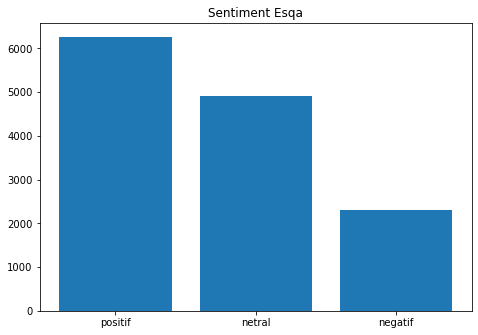

In [ ]:
#Melakukan visualisasi data berdasarkan label positif dan negatif
positif = len(df[df.Sentiment=='Positive'])
netral = len(df[df.Sentiment=='Neutral'])
negatif = len(df[df.Sentiment=='Negative'])
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
label=['positif','netral','negatif']
jumlah=[positif,netral,negatif]
ax.bar(label,jumlah)
plt.title("Sentiment Esqa")
plt.show()

In [ ]:
#Merubah data kedalam bentuk vector
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['tweet_normal'])
y=df.Sentiment

In [ ]:
#Membagi data menjadi data train dan data test sebesar 90% train set dan 10% test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.10,random_state=100)
print("Train (90:10): ",X_train1.shape,y_train1.shape,"Test: ",(X_test1.shape,y_test1.shape))

#Membagi data menjadi data train dan data test sebesar 80% train set dan 20% test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.20,random_state=100)
print("Train (80:20): ",X_train2.shape,y_train2.shape,"Test: ",(X_test2.shape,y_test2.shape))

#Membagi data menjadi data train dan data test sebesar 70% train set dan 30% test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.30,random_state=100)
print("Train (70:30): ",X_train3.shape,y_train3.shape,"Test: ",(X_test3.shape,y_test3.shape))

Train (90:10):  (12141, 11155) (12141,) Test:  ((1350, 11155), (1350,))
Train (80:20):  (10792, 11155) (10792,) Test:  ((2699, 11155), (2699,))
Train (70:30):  (9443, 11155) (9443,) Test:  ((4048, 11155), (4048,))


In [ ]:
#Pembuatan model
from sklearn.svm import SVC
clf1 = SVC(random_state=0)
clf1.fit(X_train1,y_train1)

clf2 = SVC(random_state=0)
clf2.fit(X_train2,y_train2)

clf3 = SVC(random_state=0)
clf3.fit(X_train3,y_train3)

SVC(random_state=0)

In [ ]:
#Memasukan data test untuk di uji
y_pred1=clf1.predict(X_test1)

y_pred2=clf2.predict(X_test2)

y_pred3=clf3.predict(X_test3)

In [ ]:
#Menampilkan hasil testing
df['Prediksi1'] = pd.Series(y_pred1)

df['Prediksi2'] = pd.Series(y_pred2)

df['Prediksi3'] = pd.Series(y_pred3)

df.head(50)

,text,cleaning,case_folding,tokenized_text,tweet_hapus,tweet_normal,Compound,Sentiment,Prediksi1,Prediksi2,Prediksi3
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn,vaksin untuk indonesia,vaksin untuk indonesia,"[vaksin, untuk, indonesia]","[vaksin, indonesia]",vaksin indonesia,0.0000,Neutral,Positive,Positive,Positive
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,Tak Kenal maka Tak Kebal Vaksin menjadi bukti ...,tak kenal maka tak kebal vaksin menjadi bukti ...,"[tak, kenal, maka, tak, kebal, vaksin, menjadi...","[tak, kenal, tak, kebal, vaksin, menjadi, bukt...",tak kenal tak kebal vaksin jadi bukti manusia ...,0.6124,Positive,Positive,Positive,Positive
2,Sistem satu data mendukung Vaksinasi di Indone...,Sistem satu data mendukung Vaksinasi di Indone...,sistem satu data mendukung vaksinasi di indone...,"[sistem, satu, data, mendukung, vaksinasi, di,...","[sistem, satu, data, mendukung, vaksinasi, ind...",sistem satu data dukung vaksinasi indonesia va...,0.8750,Positive,Positive,Positive,Positive
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,Siap menerima vaksin covid vaksinhalal vaksin...,siap menerima vaksin covid vaksinhalal vaksin...,"[siap, menerima, vaksin, covid, vaksinhalal, v...","[siap, menerima, vaksin, covid, vaksinhalal, v...",siap terima vaksin covid vaksinhalal vaksinsia...,0.7184,Positive,Neutral,Neutral,Neutral
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,apa perbedaan vaksin china sinovac dan sinopha...,"[apa, perbedaan, vaksin, china, sinovac, dan, ...","[apa, perbedaan, vaksin, china, sinovac, sinop...",apa beda vaksin china sinovac sinopharm merek ...,0.0000,Neutral,Positive,Positive,Positive
5,Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasi...,Dua Lagi Obat yang Dapat Selamatkan Nyawa Pasi...,dua lagi obat yang dapat selamatkan nyawa pasi...,"[dua, lagi, obat, yang, dapat, selamatkan, nya...","[obat, selamatkan, nyawa, pasien, covid, ditem...",obat selamat nyawa pasien covid temu infus vir...,-0.6124,Negative,Negative,Negative,Negative
6,"Vaksin buatan Tiongkok kembali dipertanyakan, ...",Vaksin buatan Tiongkok kembali dipertanyakan o...,vaksin buatan tiongkok kembali dipertanyakan o...,"[vaksin, buatan, tiongkok, kembali, dipertanya...","[vaksin, buatan, tiongkok, dipertanyakan, oran...",vaksin buat tiongkok tanya orang tua suntik no...,-0.7184,Negative,Negative,Negative,Negative
7,"Kabar Duka, Dokter Pribadi Paus Fransiskus Men...",Kabar Duka Dokter Pribadi Paus Fransiskus Meni...,kabar duka dokter pribadi paus fransiskus meni...,"[kabar, duka, dokter, pribadi, paus, fransisku...","[kabar, duka, dokter, pribadi, paus, fransisku...",kabar duka dokter pribadi paus fransiskus ting...,0.0000,Neutral,Neutral,Neutral,Neutral
8,Masker bekas rawan tertular virus. Pakai maske...,Masker bekas rawan tertular virus Pakai masker...,masker bekas rawan tertular virus pakai masker...,"[masker, bekas, rawan, tertular, virus, pakai,...","[masker, bekas, rawan, tertular, virus, pakai,...",masker bekas rawan tular virus pakai masker ba...,-0.7184,Negative,Positive,Positive,Positive
9,"27 wakil supervisor kab/kota sudah terlatih, 6...",wakil supervisor kab kota sudah terlatih ruma...,wakil supervisor kab kota sudah terlatih ruma...,"[wakil, supervisor, kab, kota, sudah, terlatih...","[wakil, supervisor, kab, kota, terlatih, rumah...",wakil supervisor kab kota latih rumah sakit um...,-0.6808,Negative,Positive,Positive,Positive


In [ ]:
# Menampilkan hasil prediksi 1
print('Hasil prediksi dari perbandingan 90:10')
df['Prediksi1'].value_counts()

Hasil prediksi dari perbandingan 90:10


Neutral     617
Positive    569
Negative    164
Name: Prediksi1, dtype: int64

In [ ]:
# Menampilkan hasil prediksi 2
print('Hasil prediksi dari perbandingan 80:20')
df['Prediksi2'].value_counts()

Hasil prediksi dari perbandingan 80:20


Neutral     1216
Positive    1150
Negative     333
Name: Prediksi2, dtype: int64

In [ ]:
# Menampilkan hasil prediksi 3
print('Hasil prediksi dari perbandingan 70:30')
df['Prediksi3'].value_counts()

Hasil prediksi dari perbandingan 70:30


Neutral     1810
Positive    1745
Negative     493
Name: Prediksi3, dtype: int64

In [ ]:
#Menampilkan hasil Confusion Matrix,Classification Report, Accuracy_score, F1_score, Recall_score
print("Confusion Matrix SVM (90:10)")
print(confusion_matrix(y_test1,y_pred1))
print(classification_report(y_test1,y_pred1))

# Accuracy
acu_svm1=accuracy_score(y_test1,y_pred1)
print('AKURASI SVM: %.3f' % acu_svm1)

# F1 Score
f1_score_svm1=f1_score(y_test1,y_pred1, average='weighted')
print('F1 Score SVM: %.3f' % f1_score_svm1)

# Recall Score
recall_score_svm1=recall_score(y_test1,y_pred1,average='weighted')
print('Recall Score SVM: %.3f' % recall_score_svm1)

print('-----------------------------------------------------------')

print("Confusion Matrix SVM (80:20)")
print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))

# Accuracy
acu_svm2=accuracy_score(y_test2,y_pred2)
print('AKURASI SVM: %.3f' % acu_svm2)

# F1 Score
f1_score_svm2=f1_score(y_test2,y_pred2, average='weighted')
print('F1 Score SVM: %.3f' % f1_score_svm2)

# Recall Score
recall_score_svm2=recall_score(y_test2,y_pred2,average='weighted')
print('Recall Score SVM: %.3f' % recall_score_svm2)

print('-----------------------------------------------------------')

print("Confusion Matrix SVM (70:30)")
print(confusion_matrix(y_test3,y_pred3))
print(classification_report(y_test3,y_pred3))

# Accuracy
acu_svm3=accuracy_score(y_test3,y_pred3)
print('AKURASI SVM: %.3f' % acu_svm3)

# F1 Score
f1_score_svm3=f1_score(y_test3,y_pred3, average='weighted')
print('F1 Score SVM: %.3f' % f1_score_svm3)

# Recall Score
recall_score_svm3=recall_score(y_test3,y_pred3,average='weighted')
print('Recall Score SVM: %.3f' % recall_score_svm3)

Confusion Matrix SVM (90:10)
[[149  57  16]
 [ 11 502  14]
 [  4  58 539]]
              precision    recall  f1-score   support

    Negative       0.91      0.67      0.77       222
     Neutral       0.81      0.95      0.88       527
    Positive       0.95      0.90      0.92       601

    accuracy                           0.88      1350
   macro avg       0.89      0.84      0.86      1350
weighted avg       0.89      0.88      0.88      1350

AKURASI SVM: 0.881
F1 Score SVM: 0.880
Recall Score SVM: 0.881
-----------------------------------------------------------
Confusion Matrix SVM (80:20)
[[ 310  123   32]
 [  15  984   31]
 [   8  109 1087]]
              precision    recall  f1-score   support

    Negative       0.93      0.67      0.78       465
     Neutral       0.81      0.96      0.88      1030
    Positive       0.95      0.90      0.92      1204

    accuracy                           0.88      2699
   macro avg       0.90      0.84      0.86      2699
weighted av